# AMBER Reproduction

In [1]:
import nglview as ng
import pandas as pd
import mdtraj as md
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Preparation

Create box, and add water and ions

In [ ]:
!tleap -f tleap.in

Output pdb file

In [ ]:
!cpptraj -p F1_ion.prmtop -i pdb.in

## Minimization

In [ ]:
!pmemd -O -i min.in -o min.out -p F1_ion.prmtop -c F1_ion.inpcrd -r min.rst7 -inf min.info -ref F1_ion.inpcrd -x mdcrd.min

Output pdb file

In [2]:
!cpptraj -i minpdb.in


CPPTRAJ: Trajectory Analysis. V6.29.13 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 04/10/01 02:13:28
| Available memory: 59.083 GB

INPUT: Reading input from 'minpdb.in'
  [parm F1_ion.prmtop]
	Reading 'F1_ion.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin min.rst7]
	Reading 'min.rst7' as Amber NC Restart
  [trajout min_rst7.pdb PDB]
	Writing 'min_rst7.pdb' as PDB
---------- RUN BEGIN -------------------------------------------------

PARAMETER FILES (1 total):
 0: F1_ion.prmtop, 204103 atoms, 55312 res, box: Truncated octahedron, 52226 mol, 52114 solvent

INPUT TRAJECTORIES (1 total):
 0: 'min.rst7' is a NetCDF AMBER restart file with coordinates, time, box, Parm F1_ion.prmtop (Truncated octahedron box) (reading 1 of 1)
  Coordinate processing will occur on 1 frames.

OUTPUT TRAJECTORIES (1 total):
  'min_rst7.pdb' (1 frames) is a PDB file

BEGIN TRAJECTORY PROCESSING:
................................

## Heating

In [7]:
!pmemd.cuda -O -i heat.in -o heat.out -p F1_ion.prmtop -c min.rst7 -r heat.rst7 -inf heat.info -ref min.rst7 -x mdcrd.mdheat 

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Output pdb file

In [8]:
!cpptraj -i heatpdb.in


CPPTRAJ: Trajectory Analysis. V6.29.13 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 04/10/01 02:19:28
| Available memory: 58.867 GB

INPUT: Reading input from 'heatpdb.in'
  [parm F1_ion.prmtop]
	Reading 'F1_ion.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin heat.rst7]
	Reading 'heat.rst7' as Amber NC Restart
  [trajout heat_rst7.pdb PDB]
	Writing 'heat_rst7.pdb' as PDB
---------- RUN BEGIN -------------------------------------------------

PARAMETER FILES (1 total):
 0: F1_ion.prmtop, 204103 atoms, 55312 res, box: Truncated octahedron, 52226 mol, 52114 solvent

INPUT TRAJECTORIES (1 total):
 0: 'heat.rst7' is a NetCDF AMBER restart file with coordinates, velocities, time, box, Parm F1_ion.prmtop (Truncated octahedron box) (reading 1 of 1)
  Coordinate processing will occur on 1 frames.

OUTPUT TRAJECTORIES (1 total):
  'heat_rst7.pdb' (1 frames) is a PDB file

BEGIN TRAJECTORY PROCESSING:
.............

Plot temperature


CPPTRAJ: Trajectory Analysis. V6.29.13 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 04/10/01 02:19:36
| Available memory: 58.868 GB

INPUT: Reading input from 'prop_heat.in'
  [readdata heat.out name heat]
	Reading 'heat.out' as Amber MDOUT file with name 'heat'
	Reading from mdout file: heat.out
	101 frames
  [writedata heat_tem.agr heat[TEMP]]
	Writing sets to heat_tem.agr, format 'Grace File'
 heat_TEMP
TIME: Total execution time: 0.0965 seconds.
--------------------------------------------------------------------------------
To cite CPPTRAJ use:
Daniel R. Roe and Thomas E. Cheatham, III, "PTRAJ and CPPTRAJ: Software for
  Processing and Analysis of Molecular Dynamics Trajectory Data". J. Chem.
  Theory Comput., 2013, 9 (7), pp 3084-3095.



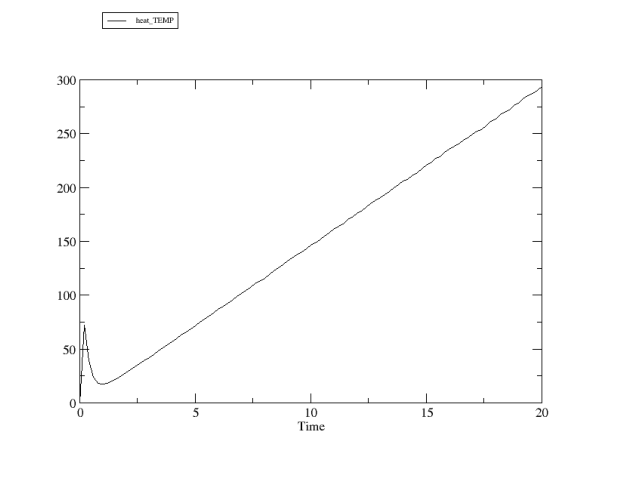

In [9]:
!cpptraj -i prop_heat.in
!grace -nosafe heat_tem.agr -hardcopy -hdevice PNG -printfile heat_tem.png

img = mpimg.imread('heat_tem.png')
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

## NPT run

In [22]:
!pmemd.cuda -O -i md.in -o md.out -p F1_ion.prmtop -c heat.rst7 -r md.rst7 -inf md.info -ref heat.rst7 -x mdcrd.md

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Output pdb

In [23]:
!cpptraj -i mdpdb.in


CPPTRAJ: Trajectory Analysis. V6.29.13 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 04/10/01 03:52:44
| Available memory: 54.355 GB

INPUT: Reading input from 'mdpdb.in'
  [parm F1_ion.prmtop]
	Reading 'F1_ion.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin md.rst7]
	Reading 'md.rst7' as Amber NC Restart
  [trajout md_rst7.pdb PDB]
	Writing 'md_rst7.pdb' as PDB
---------- RUN BEGIN -------------------------------------------------

PARAMETER FILES (1 total):
 0: F1_ion.prmtop, 204103 atoms, 55312 res, box: Truncated octahedron, 52226 mol, 52114 solvent

INPUT TRAJECTORIES (1 total):
 0: 'md.rst7' is a NetCDF AMBER restart file with coordinates, velocities, time, box, Parm F1_ion.prmtop (Truncated octahedron box) (reading 1 of 1)
  Coordinate processing will occur on 1 frames.

OUTPUT TRAJECTORIES (1 total):
  'md_rst7.pdb' (1 frames) is a PDB file

BEGIN TRAJECTORY PROCESSING:
...........................

Plot temperature, pressure, density and RMSD

In [24]:
!cpptraj -i prop_md.in
!grace -nosafe md_tem.agr -hardcopy -hdevice PNG -printfile md_tem.png
!grace -nosafe md_pressure.agr -hardcopy -hdevice PNG -printfile md_pressure.png
!grace -nosafe md_density.agr -hardcopy -hdevice PNG -printfile md_density.png
!grace -nosafe rmsd.agr -hardcopy -hdevice PNG -printfile rmsd.png


CPPTRAJ: Trajectory Analysis. V6.29.13 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 04/10/01 03:52:47
| Available memory: 54.354 GB

INPUT: Reading input from 'prop_md.in'
  [readdata md.out name md]
	Reading 'md.out' as Amber MDOUT file with name 'md'
	Reading from mdout file: md.out
	100 frames
  [writedata md_tem.agr md[TEMP]]
	Writing sets to md_tem.agr, format 'Grace File'
 md_TEMP
  [writedata md_pressure.agr md[PRESS]]
	Writing sets to md_pressure.agr, format 'Grace File'
 md_PRESS
  [writedata md_density.agr md[Density]]
	Writing sets to md_density.agr, format 'Grace File'
 md_Density
  [parm F1_ion.prmtop]
	Reading 'F1_ion.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin mdcrd.md]
	Reading 'mdcrd.md' as Amber NetCDF
  [rms rmsd :1-3093&!@H= first out rmsd.agr mass]
    RMSD: (:1-3093&!@H*), reference is first frame (:1-3093&!@H*), mass-weighted.
	Best-fit RMSD will be calculated, coords will be r

Temperature

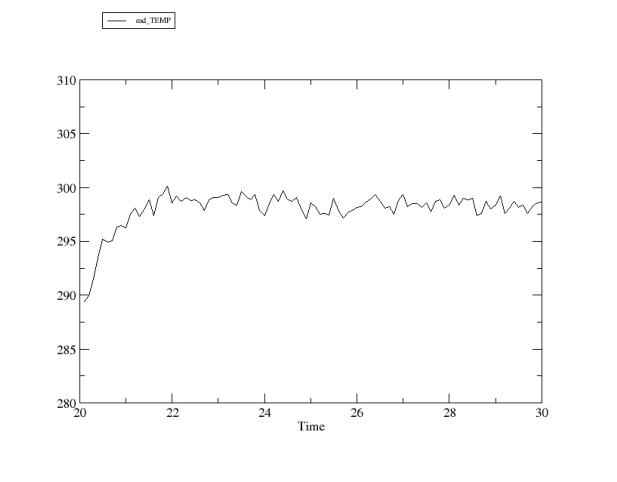

In [25]:
img = mpimg.imread('md_tem.png')
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

Pressure

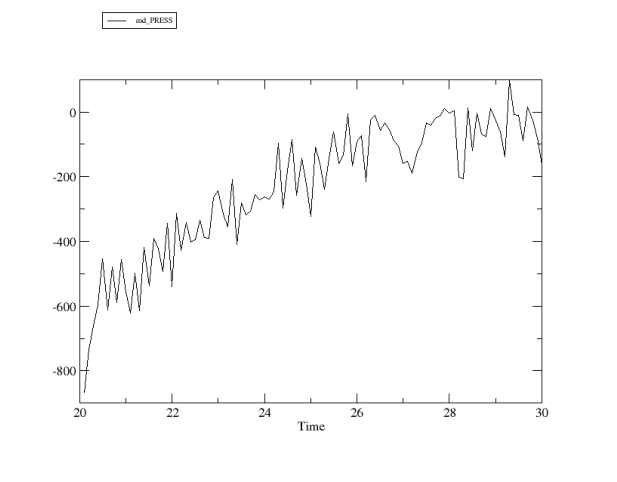

In [26]:
img = mpimg.imread('md_pressure.png')
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

Density

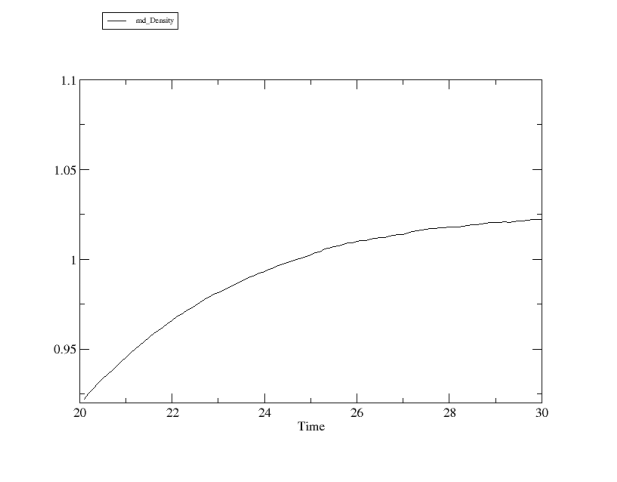

In [27]:
img = mpimg.imread('md_density.png')
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

RMSD

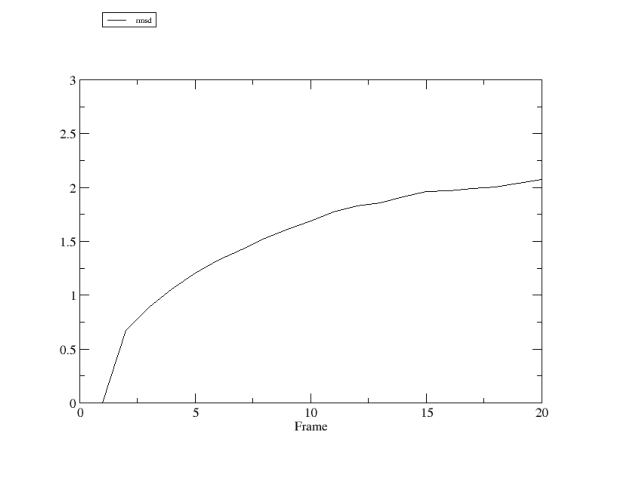

In [28]:
img = mpimg.imread('rmsd.png')
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

## Extraction

Extract coordnates, velocities and forces of protein atoms, and the centroid of mass of rotator

In [2]:
!cpptraj -i extract.in


CPPTRAJ: Trajectory Analysis. V6.29.13 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 04/11/01 06:45:35
| Available memory: 58.357 GB

INPUT: Reading input from 'extract.in'
  [parm F1_ion.prmtop]
	Reading 'F1_ion.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin mdcrd.md mdvel mdvel mdfrc mdfrc]
	Reading 'mdcrd.md' as Amber NetCDF
  [strip :WAT,Na+]
    STRIP: Stripping atoms in mask [:WAT,Na+]
  [trajout coord.crd]
	Writing 'coord.crd' as Amber Trajectory
  [trajout vel.crd mdvel]
	Writing 'vel.crd' as Amber Trajectory
  [trajout force.crd mdfrc]
	Writing 'force.crd' as Amber Trajectory
  [vector center out center.dat :2810-3093]
    VECTOR: Type Center, mask [:2810-3093], output to center.dat
  [run]
---------- RUN BEGIN -------------------------------------------------

PARAMETER FILES (1 total):
 0: F1_ion.prmtop, 204103 atoms, 55312 res, box: Truncated octahedron, 52226 mol, 52114 solvent

INPUT TRAJEC

In [5]:
!python extract.py

开始解析轨迹文件...
开始解析coordinates文件: coord.crd
处理coordinates文件: 100%|██████████▉| 285959/285961 [00:02<00:00, 96442.41it/s]
总共提取了 20 帧coordinates数据
开始解析velocities文件: vel.crd
处理velocities文件: 100%|███████████▉| 285959/285961 [00:02<00:00, 99460.32it/s]
总共提取了 20 帧velocities数据
开始解析forces文件: force.crd
处理forces文件: 100%|███████████████▉| 285959/285961 [00:03<00:00, 94921.42it/s]
总共提取了 20 帧forces数据
开始合并坐标、速度和力数据...
将合并 20 帧数据
合并数据: 100%|█████████████████████████████████| 20/20 [00:00<00:00, 71.38it/s]
合并数据分析:
第一帧数据形状: (47656, 11)
第一帧数据列名: ['Frame', 'Center_Number', 'X_coord', 'Y_coord', 'Z_coord', 'X_vel', 'Y_vel', 'Z_vel', 'Force_X', 'Force_Y', 'Force_Z']
第一帧前3行数据:
   Frame  Center_Number  X_coord  Y_coord  Z_coord  X_vel  Y_vel  Z_vel  Force_X  Force_Y  Force_Z
0      1              1   26.545  -36.090 -101.928  0.082 -0.217  0.214  -12.549  -14.294  -21.061
1      1              2   26.775  -36.106 -102.912  1.648  1.589  0.431   14.123   -2.013   -4.717
2      1              3   26.107  -35.183 

Torque Calculation

In [6]:
!python Torque.py

找到 20 个CSV文件
处理CSV文件:   0%|                                       | 0/20 [00:00<?, ?it/s]质心坐标: [14.2749, 11.8607, -18.5175]
轴向量由原子 47605 和 44603 确定
轴方向向量: [-0.4049946754, 0.2816033053, 0.8698729168]
质心与轴的距离: 1.4891226397348287 angstrom
轴总力矩: 143658.71563950472
转子部分轴总力矩: -6972.088673110799

前5个原子的力矩值:
   Center_Number  Torque_Axis
0              1 -1629.952234
1              2  1566.861934
2              3  -267.279132
3              4   407.791742
4              5  6143.537767
处理CSV文件:   5%|█▌                             | 1/20 [00:01<00:24,  1.29s/it]质心坐标: [14.2592, 11.8191, -18.4225]
轴向量由原子 47605 和 44603 确定
轴方向向量: [-0.4006835819, 0.2609894760, 0.8782580262]
质心与轴的距离: 0.3318189077628992 angstrom
轴总力矩: 160605.01680551507
转子部分轴总力矩: -788.882637514359

前5个原子的力矩值:
   Center_Number  Torque_Axis
0              1  6850.657606
1              2   249.828348
2              3  -580.096854
3              4  -594.935366
4              5 -1479.476042
处理CSV文件:  10%|███                            | 2/2